# Notebook to generate 3D structures from smiles

_This extension (installed with `pip install nb_black`) autoformats cells on cell execution_

In [3]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [10]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools
import pandas as pd
from pathlib import Path

<IPython.core.display.Javascript object>

Define constant that points to the `data/` folder using absolute path in running computer (working dir indepedent).

In [17]:
DATADIR = Path(_dh[0]).parent / "data"

<IPython.core.display.Javascript object>

## Read input data

In [18]:
fname = "proteaseFDAdrugs"
df = pd.read_csv(DATADIR / f"{fname}.csv", sep=";")
# add molecule column
PandasTools.AddMoleculeColumnToFrame(df, "Smiles", "Mol")
df.head()

,Name,Smiles,Mol
0,Saquinavir,CC(C)(C)NC(=O)[C@@H]1C[C@@H]2CCCC[C@@H]2CN1C[C...,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
1,Lopinavir,CC1=C(C(=CC=C1)C)OCC(=O)N[C@@H](CC2=CC=CC=C2)[...,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
2,Tipranavir,CCC[C@]1(CC(=C(C(=O)O1)[C@H](CC)C2=CC(=CC=C2)N...,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
3,Darunavir,CC(C)CN(C[C@H]([C@H](CC1=CC=CC=C1)NC(=O)O[C@H]...,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
4,Amprenavir,CC(C)CN(C[C@H]([C@H](CC1=CC=CC=C1)NC(=O)O[C@H]...,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."


<IPython.core.display.Javascript object>

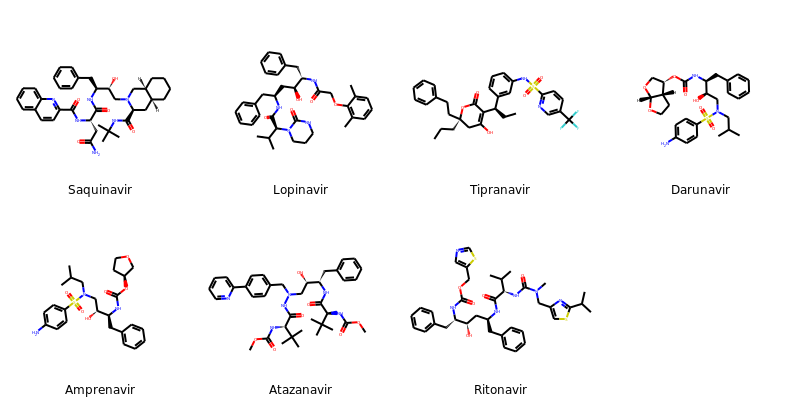

<IPython.core.display.Javascript object>

In [19]:
Draw.MolsToGridImage(df.Mol, legends=df.Name.to_list(), molsPerRow=4)

In [20]:
def generate_3D(mol):
    """
    helper function to generate 3D conformations
    """
    m2 = Chem.AddHs(mol)
    AllChem.EmbedMolecule(m2)
    AllChem.UFFOptimizeMolecule(m2)
    return m2

<IPython.core.display.Javascript object>

## Generate 3D coordinates

In [30]:
df["Mol3D"] = df["Mol"].apply(generate_3D)

<IPython.core.display.Javascript object>

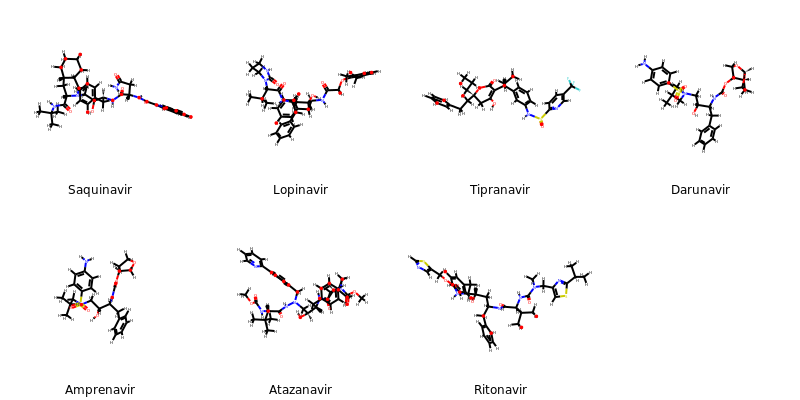

<IPython.core.display.Javascript object>

In [22]:
Draw.MolsToGridImage(df.Mol3D, legends=df.Name.to_list(), molsPerRow=4)

## Save output

In [29]:
w = Chem.SDWriter(str(DATADIR / f"{fname}_3D.sdf"))
for m in df.Mol3D:
    w.write(m)
w.close()

<IPython.core.display.Javascript object>